# Case 1 - Case Studies

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [9]:
snf = pd.read_excel("../data/SNFs.xlsx")
episodes = pd.read_excel('../data/Episodes.xlsx')
ccs = pd.read_excel('../data/CCs.xlsx')
assigned = pd.read_excel('../data/CCs_SNFs.xlsx')
time_est = pd.read_excel('../data/Task_time_Estimates.xlsx')

In [10]:
snf.isna().sum()

ProviderName                    0
PID                             0
ProviderPracticeAddress1        0
ProviderPracticeAddress2     1796
ProviderPracticeCity            0
ProviderPracticeStateCode       0
ProviderPracticeZipCode         0
County                        139
dtype: int64

In [11]:
episodes.isna().sum()

PID                 0
EpisodeID           0
ContractType        0
AdmitDate           0
DischargeDate    1149
dtype: int64

In [12]:
episodes = episodes.dropna(axis = 0)
episodes

,PID,EpisodeID,ContractType,AdmitDate,DischargeDate
0,530,1,CT1,12/1/2019,2020-01-30
2,1107,3,CT2,12/1/2019,2019-12-07
3,1107,4,CT2,12/1/2019,2019-12-02
5,842,6,CT2,12/1/2019,2019-12-04
6,1178,7,CT2,12/1/2019,2019-12-17
...,...,...,...,...,...
40993,1771,56813,CT1,1/1/2019,2019-01-15
40994,1177,56814,CT1,1/1/2019,2019-01-14
40995,1187,56815,CT1,1/1/2019,2019-02-07
40996,1771,56816,CT1,1/1/2019,2019-01-18


In [13]:
np.max(episodes['DischargeDate'])

Timestamp('2021-04-18 00:00:00')

In [14]:
time_est

,Task,ContractType,Min,Mode,Max
0,Task1,ALL,2,2,15.0
1,Task2,ALL,3,5,26.0
2,Task3,CT2,18,62,100.0
3,Task4,CT1,6,10,15.0
4,Task5,ALL,5,8,18.0
5,Task6,ALL,6,10,18.0
6,Task7,CT2,5,5,5.0
7,Task8,ALL,4,7,18.0
8,Task9,ALL,1,4,5.5
9,Task10,CT2,5,17,62.0


(array([9., 4., 2., 0., 0., 1., 0., 0., 0., 1.]),
 array([ 2.,  8., 14., 20., 26., 32., 38., 44., 50., 56., 62.]),
 <a list of 10 Patch objects>)

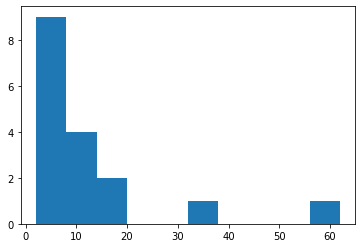

In [15]:
plt.hist(time_est['Mode'])

In [16]:
ct1 = time_est.loc[(time_est['ContractType'] != 'CT2')]
ct2 = time_est.loc[(time_est['ContractType'] != 'CT1')]
ct2

,Task,ContractType,Min,Mode,Max
0,Task1,ALL,2,2,15.0
1,Task2,ALL,3,5,26.0
2,Task3,CT2,18,62,100.0
4,Task5,ALL,5,8,18.0
5,Task6,ALL,6,10,18.0
6,Task7,CT2,5,5,5.0
7,Task8,ALL,4,7,18.0
8,Task9,ALL,1,4,5.5
9,Task10,CT2,5,17,62.0
10,Task11,CT2,6,37,50.0


In [17]:
np.sum(ct2['Mode'])

196

In [18]:
len(ct1)

13

In [19]:
len(ct2)
#more tasks in contract type 2

15

In [20]:
episodes['AdmitDate'] = pd.to_datetime(episodes.AdmitDate)

In [21]:
episodes

,PID,EpisodeID,ContractType,AdmitDate,DischargeDate
0,530,1,CT1,2019-12-01,2020-01-30
2,1107,3,CT2,2019-12-01,2019-12-07
3,1107,4,CT2,2019-12-01,2019-12-02
5,842,6,CT2,2019-12-01,2019-12-04
6,1178,7,CT2,2019-12-01,2019-12-17
...,...,...,...,...,...
40993,1771,56813,CT1,2019-01-01,2019-01-15
40994,1177,56814,CT1,2019-01-01,2019-01-14
40995,1187,56815,CT1,2019-01-01,2019-02-07
40996,1771,56816,CT1,2019-01-01,2019-01-18


In [22]:
time_in_snf = (episodes['DischargeDate']-episodes['AdmitDate'])
np.mean(time_in_snf)

Timedelta('21 days 01:51:46.195889')

In [23]:
episodes.groupby('PID')
#group by snf and then calculate mean time of stay by snf

In [24]:
cc = pd.merge(assigned, ccs, on = 'CCName', how = 'inner')

In [25]:
s = pd.merge(snf, cc, on = 'PID', how = 'left')

In [26]:
final = pd.merge(s, episodes, on = 'PID', how = 'left')

In [27]:
#final.to_csv (r'C:\Users\amandashort\Desktop\Fall 2020\Case studies\export_dataframe.csv', index = False, header=True)

In [30]:
final = pd.read_csv('../data/merged_data.csv')
final.head()

,ProviderName,PID,ProviderPracticeAddress1,ProviderPracticeAddress2,ProviderPracticeCity,ProviderPracticeStateCode,ProviderPracticeZipCode,County,CCName,Lat,Lon,EpisodeID,ContractType,AdmitDate,DischargeDate
0,648 Medical Squadron,1,8006 CHENNAULT RD,STE 1,BROOKS CITY BASE,TX,78235,Bexar,CC1,30.581417,-96.273549,NaN,NaN,NaN,NaN
1,Abilene Nursing and Rehabilitation Center,2,2630 OLD ANSON RD,NaN,ABILENE,TX,79603,Taylor,CC2,29.941640,-95.621466,NaN,NaN,NaN,NaN
2,Abilene Regional Medical Center,3,6250 US HIGHWAY 83,NaN,ABILENE,TX,79606,Taylor,CC3,29.572316,-98.664508,NaN,NaN,NaN,NaN
3,Abilene Regional Medical Center Skilled Nursin...,4,6250 HIGHWAY 83 84 AT ANTILLEY RD,NaN,ABILENE,TX,79606,Taylor,CC4,33.014365,-96.914067,NaN,NaN,NaN,NaN
4,"Absolutely Angels, Inc",5,936 E PRODUCTION DR,NaN,PILOT POINT,TX,76258,Denton,CC5,32.906213,-97.245081,NaN,NaN,NaN,NaN


In [31]:
final.dtypes

ProviderName                  object
PID                            int64
ProviderPracticeAddress1      object
ProviderPracticeAddress2      object
ProviderPracticeCity          object
ProviderPracticeStateCode     object
ProviderPracticeZipCode        int64
County                        object
CCName                        object
Lat                          float64
Lon                          float64
EpisodeID                    float64
ContractType                  object
AdmitDate                     object
DischargeDate                 object
dtype: object

In [32]:
final.shape

(40418, 15)

In [33]:
final.describe()
#not really helpful

,PID,ProviderPracticeZipCode,Lat,Lon,EpisodeID
count,40418.000000,40418.000000,627.000000,627.000000,39849.000000
mean,963.676901,76961.927854,31.634300,-96.580880,27120.102637
std,539.821562,1336.133952,1.353716,2.703162,17224.734893
min,1.000000,75002.000000,29.519390,-106.433022,1.000000
25%,505.000000,75785.000000,30.256568,-97.849808,10755.000000
50%,1071.000000,77070.000000,31.612382,-96.713426,31229.000000
75%,1456.000000,78028.000000,33.060501,-94.645918,42174.000000
max,1813.000000,79936.000000,33.494254,-94.006402,56817.000000


In [34]:
final['ContractType'].value_counts()

CT2    29467
CT1    10382
Name: ContractType, dtype: int64

In [35]:
final['PID'].nunique()
#1813 snf's

1813

In [36]:
final['CCName'].nunique()
#only 19 CC's employed at snf's currently

19

In [37]:
#contract type 1 only
final_ct1 = final[(final['ContractType'] == 'CT1')]

In [38]:
#contract type 2 only
final_ct2 = final[(final['ContractType'] == 'CT2')]

The data in the task time estimates document does not merge with the other data and needs to be looked at separately.

In [39]:
final['AdmitDate']= pd.to_datetime(final['AdmitDate'])

In [40]:
final['DischargeDate']= pd.to_datetime(final['DischargeDate'])

In [41]:
final['StayLength'] = final['DischargeDate'] - final['AdmitDate']

In [42]:
final['StayLength'].describe()

count                      39849
mean     21 days 01:51:46.195889
std      24 days 11:14:07.596675
min           -61 days +00:00:00
25%             11 days 00:00:00
50%             16 days 00:00:00
75%             22 days 00:00:00
max            504 days 00:00:00
Name: StayLength, dtype: object

In [43]:
final[(final['StayLength'] > '100 days')]
#316 records of patients staying longer than 100 days

,ProviderName,PID,ProviderPracticeAddress1,ProviderPracticeAddress2,ProviderPracticeCity,ProviderPracticeStateCode,ProviderPracticeZipCode,County,CCName,Lat,Lon,EpisodeID,ContractType,AdmitDate,DischargeDate,StayLength
673,ALLEGIANT WELLNESS AND REHAB,22,724 W RENDON CROWLEY RD,NaN,FORT WORTH,TX,76036,NaN,NaN,NaN,NaN,54173.0,CT1,2019-12-01,2020-05-31,182 days
687,ALLEGIANT WELLNESS AND REHAB,22,724 W RENDON CROWLEY RD,NaN,FORT WORTH,TX,76036,NaN,NaN,NaN,NaN,54617.0,CT1,2019-10-01,2020-03-31,182 days
701,ALLEGIANT WELLNESS AND REHAB,22,724 W RENDON CROWLEY RD,NaN,FORT WORTH,TX,76036,NaN,NaN,NaN,NaN,55061.0,CT1,2019-08-01,2020-01-30,182 days
715,ALLEGIANT WELLNESS AND REHAB,22,724 W RENDON CROWLEY RD,NaN,FORT WORTH,TX,76036,NaN,NaN,NaN,NaN,55505.0,CT1,2019-06-01,2019-11-30,182 days
729,ALLEGIANT WELLNESS AND REHAB,22,724 W RENDON CROWLEY RD,NaN,FORT WORTH,TX,76036,NaN,NaN,NaN,NaN,55949.0,CT1,2019-04-01,2019-09-30,182 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39662,Windsor Atrium,1776,1814 ATRIUM PLACE DR,NaN,HARLINGEN,TX,78550,Cameron,NaN,NaN,NaN,6229.0,CT1,2019-08-01,2019-11-21,112 days
40077,Woodland Park Nursing And Rehabilitation,1801,101 WOODLAND PARK DR,NaN,SHEPHERD,TX,77371,San Jacinto,NaN,NaN,NaN,1813.0,CT1,2019-11-01,2020-03-03,123 days
40081,Woodland Park Nursing And Rehabilitation,1801,101 WOODLAND PARK DR,NaN,SHEPHERD,TX,77371,San Jacinto,NaN,NaN,NaN,2138.0,CT1,2019-11-01,2020-08-15,288 days
40091,Woodland Park Nursing And Rehabilitation,1801,101 WOODLAND PARK DR,NaN,SHEPHERD,TX,77371,San Jacinto,NaN,NaN,NaN,3996.0,CT1,2019-09-01,2020-01-01,122 days


In [44]:
final = final[(final['StayLength'] <= '100 days')]
#get rid of stays with length over 100 days

In [45]:
final = final[(final['DischargeDate'] <= '2020-09-18')]
#only keep records with discharge dates of today or earlier

In [46]:
final = final[(final['StayLength'] > '0')]
#stay lengths greater than 0

In [47]:
np.max(final['AdmitDate'])
#29,464 records

Timestamp('2019-12-01 00:00:00')

In [215]:
grouped = final.groupby(['PID', 'AdmitDate'])

In [216]:
grouped.describe()

ProviderPracticeZipCode                                  \
                                  count     mean  std      min      25%   
PID  AdmitDate                                                            
6    2019-01-01                    11.0  77845.0  0.0  77845.0  77845.0   
     2019-02-01                     5.0  77845.0  0.0  77845.0  77845.0   
     2019-03-01                     7.0  77845.0  0.0  77845.0  77845.0   
     2019-04-01                     5.0  77845.0  0.0  77845.0  77845.0   
     2019-05-01                     4.0  77845.0  0.0  77845.0  77845.0   
...                                 ...      ...  ...      ...      ...   
1812 2019-02-01                     3.0  77995.0  0.0  77995.0  77995.0   
     2019-04-01                     1.0  77995.0  NaN  77995.0  77995.0   
     2019-07-01                     1.0  77995.0  NaN  77995.0  77995.0   
1813 2019-02-01                     1.0  78164.0  NaN  78164.0  78164.0   
     2019-06-01                     1.0  78164.0  NaN  78164.0  78164.0   

                                             Lat             ... EpisodeID  \
                     50%      75%      max count       mean  ...       75%   
PID  AdmitDate                                               ...             
6    2019-01-01  77845.0  77845.0  77845.0  11.0  30.317991  ...  48173.50   
     2019-02-01  77845.0  77845.0  77845.0   5.0  30.317991  ...  17331.00   
     2019-03-01  77845.0  77845.0  77845.0   7.0  30.317991  ...  45678.50   
     2019-04-01  77845.0  77845.0  77845.0   5.0  30.317991  ...  44409.00   
     2019-05-01  77845.0  77845.0  77845.0   4.0  30.317991  ...  43075.25   
...                  ...      ...      ...   ...        ...  ...       ...   
1812 2019-02-01  77995.0  77995.0  77995.0   0.0        NaN  ...  48153.50   
     2019-04-01  77995.0  77995.0  77995.0   0.0        NaN  ...  12165.00   
     2019-07-01  77995.0  77995.0  77995.0   0.0        NaN  ...   6741.00   
1813 2019-02-01  78164.0  78164.0  78164.0   0.0        NaN  ...  48155.00   
     2019-06-01  78164.0  78164.0  78164.0   0.0        NaN  ...  43048.00   

                         StayLength                           \
                     max      count                     mean   
PID  AdmitDate                                                 
6    2019-01-01  48176.0         11  14 days 19:38:10.909090   
     2019-02-01  47000.0          5         10 days 09:36:00   
     2019-03-01  45680.0          7  16 days 13:42:51.428571   
     2019-04-01  44410.0          5         13 days 19:12:00   
     2019-05-01  43076.0          4         14 days 12:00:00   
...                  ...        ...                      ...   
1812 2019-02-01  48154.0          3         16 days 08:00:00   
     2019-04-01  12165.0          1         21 days 00:00:00   
     2019-07-01   6741.0          1         15 days 00:00:00   
1813 2019-02-01  48155.0          1         17 days 00:00:00   
     2019-06-01  43048.0          1         18 days 00:00:00   

                                                                             \
                                    std               min               25%   
PID  AdmitDate                                                                
6    2019-01-01  7 days 07:38:57.254089   5 days 00:00:00  10 days 12:00:00   
     2019-02-01  6 days 00:35:55.518652   4 days 00:00:00   4 days 00:00:00   
     2019-03-01  9 days 05:38:26.288804   8 days 00:00:00  10 days 12:00:00   
     2019-04-01  5 days 05:10:07.270247   7 days 00:00:00  11 days 00:00:00   
     2019-05-01  6 days 04:35:36.257884   6 days 00:00:00  12 days 00:00:00   
...                                 ...               ...               ...   
1812 2019-02-01  2 days 12:23:55.231735  14 days 00:00:00  15 days 00:00:00   
     2019-04-01                     NaT  21 days 00:00:00  21 days 00:00:00   
     2019-07-01                     NaT  15 days 00:00:00  15 days 00:00:00   
1813 2019-02-01            

In [220]:
pd.DataFrame({'count' : final.groupby( [ "PID", "AdmitDate"] ).size()}).reset_index()

,PID,AdmitDate,count
0,6,2019-01-01,11
1,6,2019-02-01,5
2,6,2019-03-01,7
3,6,2019-04-01,5
4,6,2019-05-01,4
...,...,...,...
7359,1812,2019-02-01,3
7360,1812,2019-04-01,1
7361,1812,2019-07-01,1
7362,1813,2019-02-01,1


In [221]:
pd.DataFrame({'count' : final.groupby( [ "PID"] ).size()}).reset_index()

,PID,count
0,6,46
1,8,90
2,9,69
3,10,4
4,11,25
...,...,...
1216,1808,27
1217,1810,2
1218,1811,4
1219,1812,5
